# <p style="text-align: center;">How To</p>

## <p style="text-align: center;">Mesurer une répétabilité de positionnement</p>
---

## I. Configuration logiciel et hardware
---

* Regler la valeur **Sampling cycle** à 1ms

*note : envoyer les nouvelles données de configuration via le bouton "Send settings to controler"*

![CommonSettings](./img/common-set.png)

* Regler la valeur **Averaging Times** à 1

*note : envoyer les nouvelles données de configuration via le bouton "Send settings to controler"*

![MovingAverage](./img/mov-ave.png)

## II. Outils statistiques pour l'interprétation des données
---

>Le télémètre laser permet l'acquisition d'une mesure à chaque déclenchement du signal trigger. Chaque point est donc une mesure de position. L'échantillon minimum conseillé est de 11 points afin d'évaluer une répétabilité. Toutefois il sera d'usage d'acquérir au moins 100 points pour avoir un nombre d'échantillons suffisant pour utiliser les outils de statistiques descriptives avec un niveau de confiance satisfaisant.

Les outils graphique :

1. Le [**nuage de points**](https://fr.wikipedia.org/wiki/Nuage_de_points_(statistique)) permet d'illustrer les données mesurées
2. La [**boite à moustache**](https://fr.wikipedia.org/wiki/Bo%C3%AEte_%C3%A0_moustaches) permet d'évaluer visuellement les interquartiles ainsi que la médiane de la série de données
3. [**L'histogramme**](https://fr.wikipedia.org/wiki/Histogramme) permet d'observer la repartitions des classes de points de mesures
4. Le [**QQ-Plot**](https://fr.wikipedia.org/wiki/Diagramme_quantile-quantile) permet de vérifier que la série de données suit une loi normale

Les indicateurs statistiques permettant de confirmer ou non une répétabilité sont :

1. la [**p-value**](https://fr.wikipedia.org/wiki/Valeur_p)
2. La [**capabilité**](https://fr.wikipedia.org/wiki/Capabilit%C3%A9_machine) noté Cp

Ces différents outils statistiques permettent donc de vérifier une répétabilité de positionnement à l'aide des mesures acquises via le télémètre laser Keyence.

Tous ces indicateurs sont générés automatiquement à l'aide de la bibliothèque `Keyence1D` présenté dans la suite.

## III. Post traitement des mesures de répétabilité issue du télémètre laser Keyence
---

### 1. Prérequis

1. Installer le package Anaconda : https://www.anaconda.com/products/individual
2. Installer le package Keyence1D : **lien git à ajouter**
3. Utiliser Jupyter Notebook ou tout autre IDE Python

### 2. Premier exemple : traitement d'un fichier de données brute et interprétations 

Charger le package `repetabilityMeasure` à partir de la bibliothèque `Keyence1D` est une fonction permettant d'affichier les mesures issues du fichier csv géneré depuis le logiciel Keyence.

Pour importer la fonction (le fichier Keyence1D.py doit être présent dans votre projet) :
```python
from keyence1D import repetabilityMeasure
```

Exécuter la fonction avec comme paramètre le nom du fichier brute :
```python
repetabilityMeasure("rawData.csv")
```

Enfin la fonction `repetabilityMeasure()` fournit 5 informations pour analyser les données mesurer :
* Nuages de points : permet l'observation des points de mesures
* Boîte à Tukey : permet l'observation de la médiane et des valeurs Max, Min et les interquartiles
* Histogramme des positions : permet l'observation de la distribution des points de mesures
* QQ-Plot ou Droite de Henry : permet de tester si la distribution suit une loi Normale
* p-value : test statistique permettant de **valider ou non si la distribution suit une loi Normale**

Ci-dessous un exemple :

./datas/Results_Position_Y_180326.csv as Statistics=0.989, p=0.00029


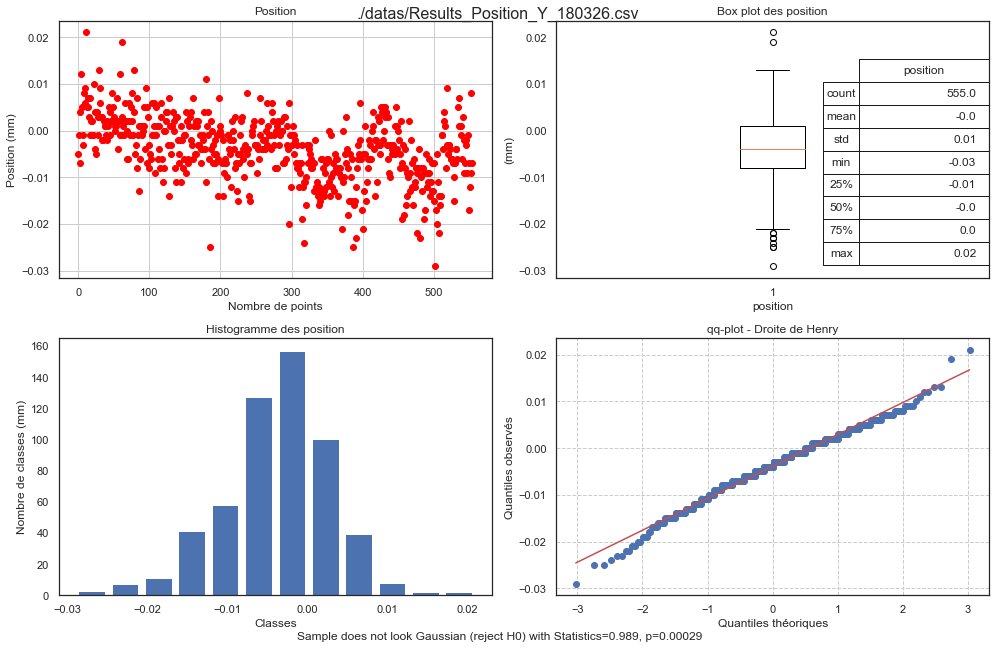

In [28]:
# Premier exemple si on souhaite faire une analyse de la répétabilité sur un seul fichier

from keyence1D import repetabilityMeasure                              # Importer la fonction répétabilité
import os                                                              # Importer la fonction os
os.chdir(r"C:\Users\Home\Documents\Git\KeyenceDataProcessing")         # Définir le repertoire des données brutes

repetabilityMeasure("./datas/Results_Position_Y_180326.csv")           # Executer la fonction avec le nom du fichier brute

**Commentaires** : *le nuage de points et la boite de tukey ainsi que l'histogramme semble indiquer des valeurs homogènes et suivant une loi Normale. Toutefois, le QQ-plot indique que pour les classe supérieur à 0.01 et inférieur à -0.02 il existe une discontinuité. Enfin la p-value est < à 5% donc cette mesure n'est pas répétable.*

### 3. Deuxième exemple : traitement de plusieurs fichiers de mesures brutes et intervalle de tolérance

>De manière générale, on considère que si le test statistique donne une p-value > 5%, alors la distribution suit une loi Normale. Dans le cas ou les mesures suivent une loi Normale **et uniquement dans ce cas**, alors il est beaucoup plus pratique d'utiliser l'indicateur de capabilité Cp : 

$$Cp = \frac {IT}{6\sigma}$$
avec :
* Cp = Capabilité --> **On considère un processus capable si Cp > 1.33**
* IT = Intervalle de tolérance
* 𝜎 = écart type

La fonction `repetabilityMeasure()` prend aussi comme paramètre l'IT à tester, ainsi que l'option de sauvegarde des résultats sous la forme d'un fichier image au format ".png". dans le cas ou la p-value > 5%, **et uniquement dans ce cas**, alors la Cp sera aussi calculé. Ci-dessous un exemple de paramètres pour un IT = 1mm


```python
repetabilityMeasure('rawData.csv',   # Fichier de données brute
                    pngSave=True,    # Option de sauvegarde des résultats au format .png (True ou False)
                    IT = 1)          # Intervalle de tolérance IT = 1mm pour le calcul de Cp
```


Il est donc tout à fait possible de tester plusieurs fichiers brutes issus du logiciel Keyence, car dans certains cas plusieurs jeux de données sont a comparé.

Ci-dessous un exemple :

Distrib_Norm.csv as Statistics=0.999, p=0.88814
Cp =0.167 
Distrib_Not_Norm.csv as Statistics=0.978, p=0.00000


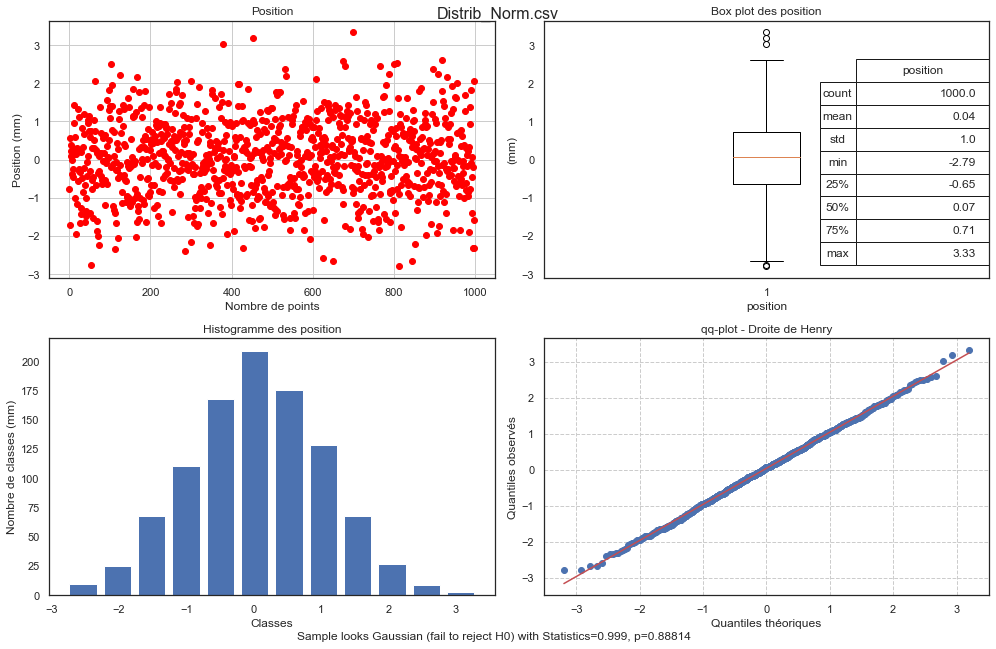

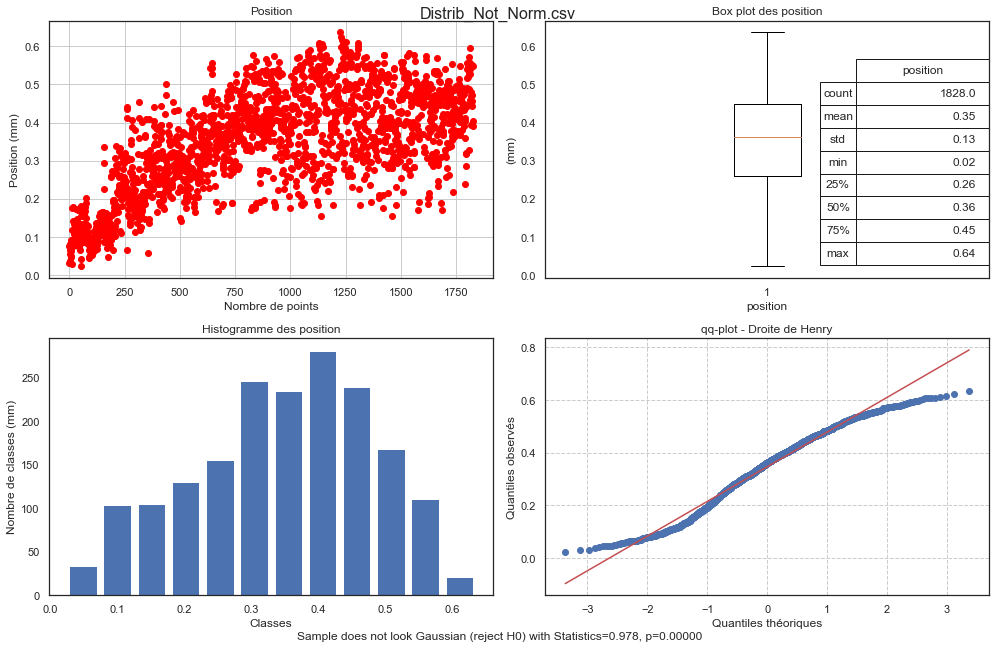

In [3]:
# Deuxieme exemple si on souhaite faire une analyse de la répétabilité sur plusieurs fichiers

from keyence1D import repetabilityMeasure                              # Importer la fonction répétabilité
import os                                                              # Importer la fonction os
import glob                                                            # Importer la fonction glob
os.chdir(r"C:\Users\Home\Documents\Git\KeyenceDataProcessing\datas")   # Définir le repertoire des données brutes

for file in glob.glob("*.csv"):                         # Parcourir le repertoire pour traiter les fichiers csv brutes
    repetabilityMeasure(file, pngSave=True, IT = 1)     # Execution de la fonction pour tous les fichiers et sauvegarde png

**Commentaires** : *uniquement le fichier 'Distrib_Norm.csv' présente une distribution normal mais à une capabilité de 0.167, donc trés inférieur à 1.33 pour un intervalle de tolérance de 1mm.*

# Conclusion

>Le télémètre laser est capable d'acquérir plusieurs points de mesure pour évaluer une répétabilité. La fonction de déclenchement (Trigger) est à privilégier afin d'obtenir un jeu de données brutes exploitables en utilisant les outils de traitement de données du package `Keyence1D`.

>Les valeurs Min et Max ne sont pas des indicateurs suffisant pour s'assurer que le positionnement d'un axe est répétable. L'estimation de p-value et de Cp sont des estimateurs statistiques plus pertinents. Le but est de s'assurer que les positions successives prises par l'axe seront toujours contenues dans l'intervalle de tolérance souhaitée. 